### Stock Market Predictor

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
%matplotlib inline

In [2]:
stocks = input("Enter the stock symbol: ")
data = yf.download(stocks,"2009-01-01","2022-04-01", auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-12-31,860.000000,883.599976,858.400024,883.599976,35
2009-01-02,881.500000,881.500000,868.900024,878.799988,46
2009-01-05,882.000000,883.500000,847.000000,857.200012,35
2009-01-06,855.099976,867.599976,840.000000,865.400024,113
2009-01-07,862.000000,867.000000,837.700012,841.099976,101


In [3]:
data.shape

(3334, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3334 entries, 2008-12-31 to 2022-03-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3334 non-null   float64
 1   High    3334 non-null   float64
 2   Low     3334 non-null   float64
 3   Close   3334 non-null   float64
 4   Volume  3334 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 156.3 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000
mean,1395.126845,1402.350060,1387.309868,1395.011487,5593.631074
std,263.057319,264.671402,261.370296,263.033953,29643.451807
min,805.599976,808.799988,805.599976,806.700012,0.000000
25%,1219.124969,1224.224976,1212.900024,1219.900024,43.000000
50%,1313.450012,1319.450012,1309.299988,1313.699951,146.000000
75%,1619.150024,1627.424988,1608.275024,1616.099976,482.750000
max,2053.600098,2072.000000,2040.000000,2051.500000,386334.000000


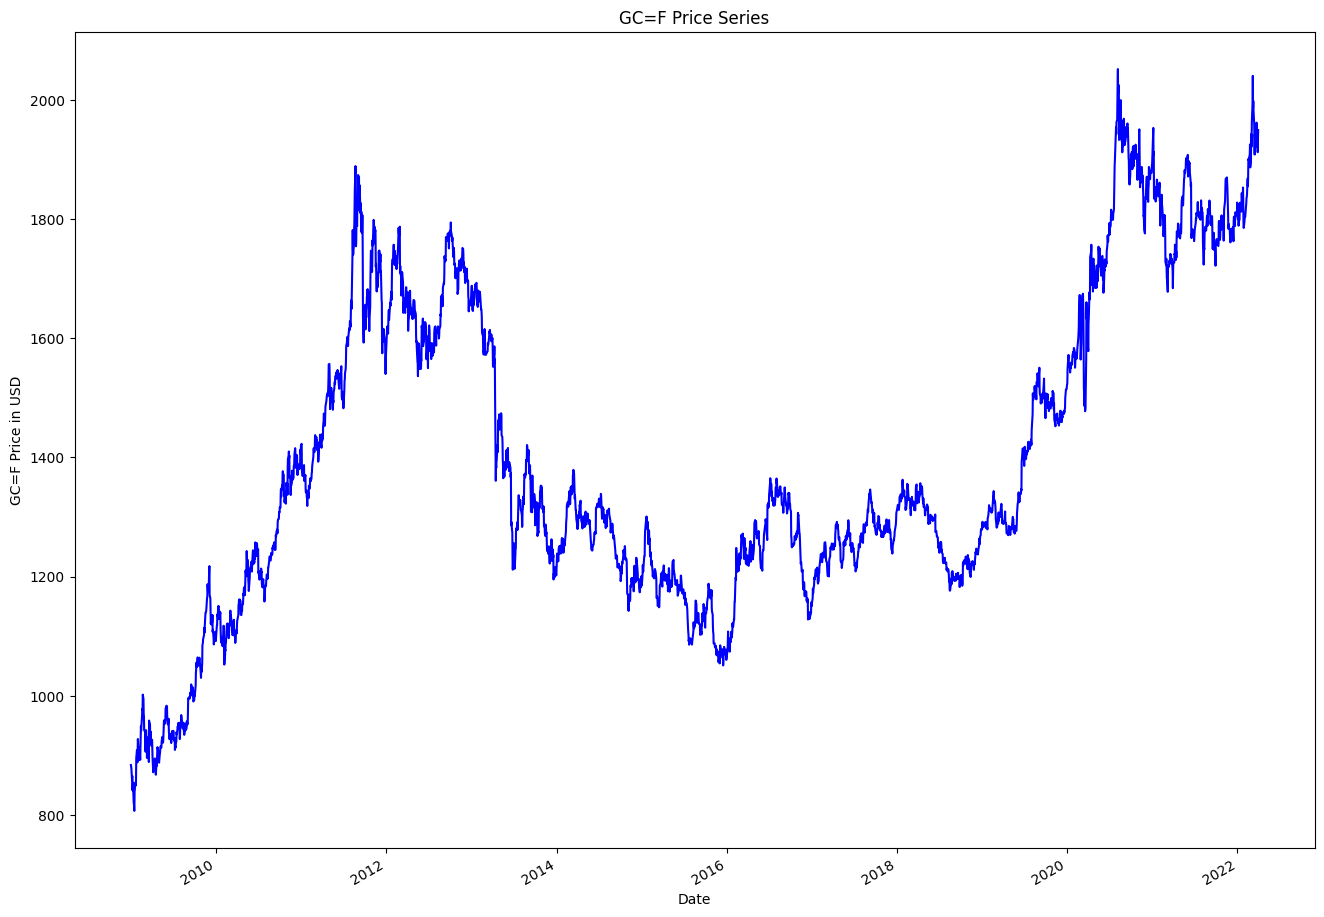

In [6]:
data["Close"].plot(figsize=(16,12),color='b', label='Close')
plt.ylabel('{} Price in USD'.format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

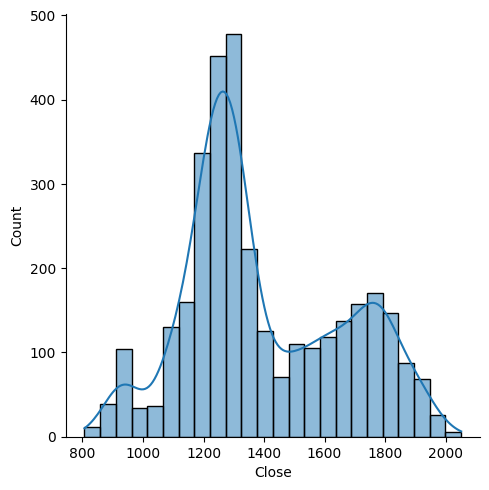

In [7]:
sns.displot(data["Close"], kde=True)

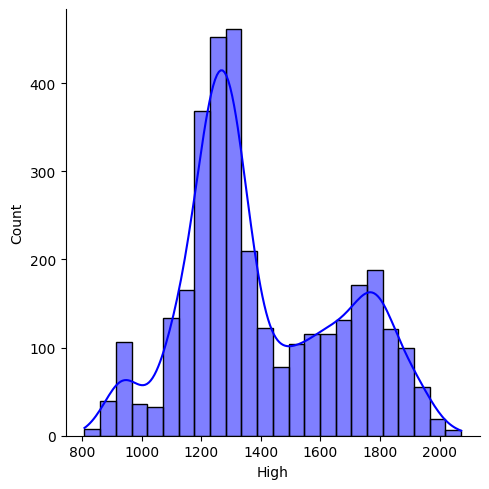

In [8]:
sns.displot(data["High"], kde=True, color='b')

In [9]:
# Trying Linear Regression
x = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2667, 4)
(667, 4)
(2667,)
(667,)


In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

#### MSE --> Mean Sq 
#### RMSE --> sqrt(MSE)
#### r2 sq

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
def calculate_matrix(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2)

calculate_matrix(y_test, regressor.predict(x_test))

Mean Squared Error:  26.836427182947386
Root Mean Squared Error:  5.180388709638244
R2 Score:  0.9996122495764137


In [12]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(x_train, y_train)
ri = Ridge().fit(x_train, y_train)

la_p = la.predict(x_test)
ri_p = ri.predict(x_test)
calculate_matrix(y_test, la_p)
calculate_matrix(y_test, ri_p)

Mean Squared Error:  52.8592694564878
Root Mean Squared Error:  7.270438051210381
R2 Score:  0.9992362543649164
Mean Squared Error:  26.83647702956109
Root Mean Squared Error:  5.1803935207241825
R2 Score:  0.9996122488561969


/home/heisenberg/Workplace/Machine Learning/Stock Price Prediction/myenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.095e+04, tolerance: 1.844e+04
  model = cd_fast.enet_coordinate_descent(


In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

params_grid = {'kernel': ['rbf',],'C': [1, 10, 100, 1000],'gamma': [0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(svr, params_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.139 total time=   0.3s
[CV 2/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.080 total time=   0.3s
[CV 3/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.044 total time=   0.3s
[CV 4/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.113 total time=   0.3s
[CV 5/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.121 total time=   0.3s
[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.137 total time=   0.3s
[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.077 total time=   0.3s
[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.041 total time=   0.3s
[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.109 total time=   0.3s
[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.119 total time=   0.3s
[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.104 total time=   0.3s
[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [14]:
grid.best_estimator_

SVR(C=1000, gamma=0.0001)

In [15]:
svr = SVR(C=1000, gamma=0.0001, kernel='rbf')
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

In [ ]:
import joblib
joblib.dump(ri, 'model.pkl')
ridge_from_joblib = joblib.load('model.pkl')